In [ ]:
from ast import parse
from locale import normalize
import torch
import torch.nn as nn
import numpy as np
from linear_cca import linear_cca
from torch.utils.data import BatchSampler, SequentialSampler, RandomSampler
from DeepCCAModels import DeepCCA
from utils import load_mnist_data, load_cifar_data, svm_classify, get_normalized_agumented_data, normalize_cifar, split_image
import time
import logging

from datetime import datetime
import torchvision
from copy import deepcopy
import torchvision.transforms as T
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random
import matplotlib.image as im



try:
    import cPickle as thepickle
except ImportError:
    import _pickle as thepickle

import gzip
import numpy as np
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import argparse

In [55]:
writer = SummaryWriter(log_dir=f"./final-runs/graphs")

In [56]:
def fig2img(fig):
    fig.savefig("./tmp.png")
    return torchvision.io.read_image("./tmp.png")[:3,:,:]


def get_tsne_plot(data,labels):
    tsne = TSNE(n_components=2, learning_rate='auto', init='random')
    train_x = tsne.fit_transform(data)
    # fig = plt.figure(figsize=(30,20))
    fig = plt.figure()
    sns.scatterplot(hue=labels.tolist(),
     x=train_x[:,0],
      y=train_x[:,1],
       palette=sns.color_palette("hls", len(np.unique(labels))))
    
    return fig2img(fig)
def make_grid(tensor):
    img_num = tensor.shape[0]
    # return torch.cat((torch.cat([t for t in tensor[:img_num//2]], 0),
    #  torch.cat([t for t in tensor[img_num//2:]], 0)), 1)
    return torch.cat([t for t in tensor[:img_num]], -2)

In [57]:
cifar_data1 = load_cifar_data('./cifar-10-batches-py')
cifar_data1, cifar_data2 = split_image(cifar_data1, img_width=32)

In [58]:
mnist_data1_noisy = load_mnist_data('./noisymnist_view1.gz')
mnist_data2_noisy = load_mnist_data('./noisymnist_view2.gz')

mnist_data1_split, mnist_data2_split = split_image(deepcopy(mnist_data1_noisy), img_width=28, channel=1)


loading data ...
loading data ...


In [59]:
%matplotlib inline

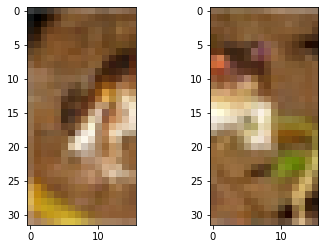

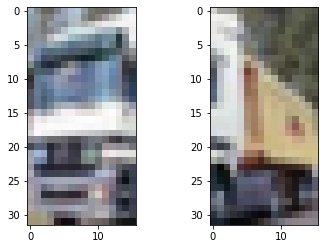

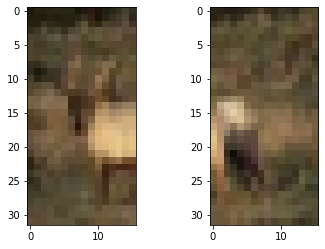

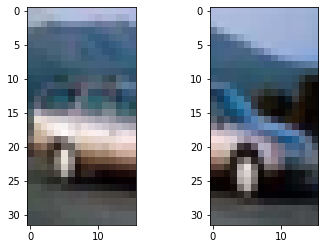

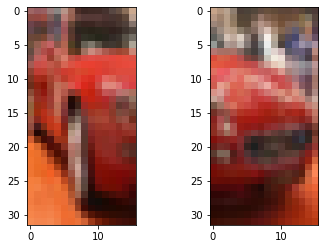

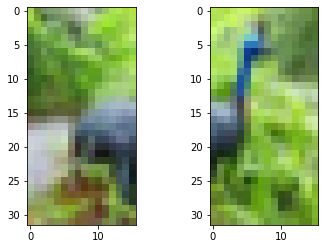

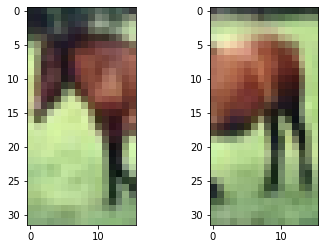

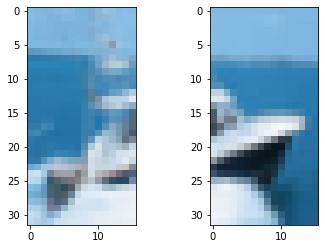

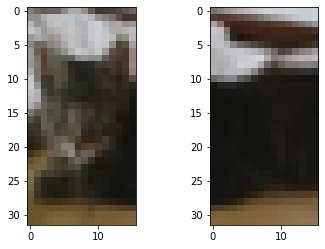

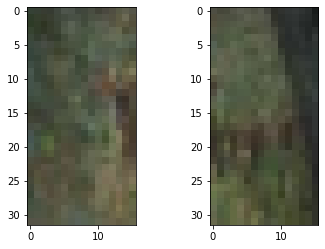

In [60]:
for i in range(10):
    first_data = cifar_data1[0][0][i].reshape(3,32,16).numpy().astype(int).transpose(1,2,0)
    second_data = cifar_data2[0][0][i].reshape(3,32,16).numpy().astype(int).transpose(1,2,0)
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(first_data)
    plt.subplot(1,2,2)
    plt.imshow(second_data)
    plt.tight_layout
    plt.show()

In [ ]:
def plot_image_grid(data_1, data_2, channel = 3, img_num=10, img_size=32, figname="fig", split = True):

    if channel == 1 :
        cmap='gray'
    else:
        cmap='viridis'
    
    if data_1[0][0][:img_num].max() > 1:
        use_int = True
    else:
        use_int = False
    
    plt.figure()
    if split:
        grid_first_image = make_grid(data_1[0][0][:img_num].view(-1, channel, img_size, img_size//2)).reshape(channel,-1,img_size//2).numpy()
    else:
        grid_first_image = make_grid(data_1[0][0][:img_num].view(-1, channel, img_size, img_size)).reshape(channel,-1,img_size).numpy()
    
    if use_int:
        final_img = grid_first_image.astype('uint8').transpose(1,2,0).squeeze()
        plt.imshow(final_img,cmap=cmap)
    else:
        final_img = grid_first_image.transpose(1,2,0).squeeze().squeeze()
        plt.imshow(final_img,cmap=cmap)

    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    im.imsave(f"./figures/{figname}-first.png", final_img, cmap=cmap)
    # plt.savefig(f"./figures/{figname}-first.png")
    plt.figure()
    if split:
        grid_second_image = make_grid(data_2[0][0][:img_num].view(-1, channel, img_size, img_size//2)).reshape(channel,-1,img_size//2).numpy()
    else:
        grid_second_image = make_grid(data_2[0][0][:img_num].view(-1, channel, img_size, img_size)).reshape(channel,-1,img_size).numpy()
    if use_int:
        final_img = grid_second_image.astype('uint8').transpose(1,2,0).squeeze()
        plt.imshow(final_img,cmap=cmap)
    else:
        final_img = grid_second_image.transpose(1,2,0).squeeze()
        plt.imshow(final_img,cmap=cmap)
    
    im.imsave(f"./figures/{figname}-second.png", final_img, cmap=cmap)


    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    # plt.savefig(f"./figures/{figname}-second.png")

plot_image_grid(cifar_data1, cifar_data2, figname="cifar10-split", img_size=32, channel=3)
plot_image_grid(mnist_data1_noisy, mnist_data2_noisy, figname="mnist-noisy", img_size=28, split=False, channel=1)
plot_image_grid(mnist_data1_split, mnist_data2_split, figname="mnist-split", img_size=28, channel=1)




In [ ]:
im.imsa